In [1]:
import os
import time

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from geopy.geocoders import Nominatim


In [3]:
#df = pd.read_csv('HFER_e2.txt', encoding = "utf-8",index_col = 'Election Date')
df = pd.read_csv('data/HFER_e_lat_lon_qc.csv', encoding = "utf-8",index_col = 'Election Date')

In [4]:
df = df[pd.to_datetime(df.index) > pd.to_datetime('1994-01-01')]
dfq= df[df['Province']=='Quebec']

In [5]:
dfq.head()

,Election Type,Parliament,Province,Riding,Last Name,First Name,Gender,Occupation,Party,Votes,Votes (%),Elected,lat,lon
Election Date,,,,,,,,,,,,,,
1995-02-13,B/P,35,Quebec,brome,Paradis,Denis,NaN,lawyer,Liberal,19078,51.02,1,45.189207,-72.562857
1995-02-13,B/P,35,Quebec,brome,Bertrand,Jean-François,NaN,communication consultant,Bloc Québécois,15764,42.16,0,45.189207,-72.562857
1995-02-13,B/P,35,Quebec,brome,Lever,Guy,NaN,administrator,Progressive Conservative,1235,3.30,0,45.189207,-72.562857
1995-02-13,B/P,35,Quebec,brome,Maheux,Line,NaN,marketing consultant,Reform Party of Canada,517,1.38,0,45.189207,-72.562857
1995-02-13,B/P,35,Quebec,brome,Vachon,Paul,NaN,retired,New Democratic Party,371,0.99,0,45.189207,-72.562857


In [6]:
# give number for each major party or other
def partyLabel (row):
    if row['Party']=='Liberal':
        return 0
    elif (row['Party']=='Conservative' or row['Party']=='Progressive Conservative'or
            row['Party']== 'Reform Party of Canada' or row['Party']== 'Reform'or
         row['Party']== 'Canadian Alliance'or row['Party']=='Conservative Party of Canada'):
        return 1
    elif row['Party']=='New Democratic Party' or row['Party']== 'Co-operative Commonwealth Federation':
        return 2
    elif row['Party']=='Green Party of Canada':
        return 3
    elif row['Party']=='Bloc Québécois':
        return 4
    else:
        return 5
dfq['partyLabel']= dfq.apply (lambda row: partyLabel(row), axis=1)

In [7]:
#dataframe with one row per riding per date
dfqUnique=pd.DataFrame(columns=['Election Date', 'Province', 'Riding','Results','lat','lon'])
prevRiding=''
i=0
for date, row in dfq.iterrows():
    if prevRiding != row['Riding']:
        if i>2:
            print( sum(dfqUnique.loc[i]['Results']))
        i+=1
        Results=np.zeros(6)
        Results[row['partyLabel']]+= row['Votes (%)']/100
        dfqUnique.loc[i]=[date] + [row['Province'],row['Riding'],Results,row['lat'],row['lon']]
    elif prevRiding == row['Riding']:
        dfqUnique.loc[i]['Results'][row['partyLabel']]+=row['Votes (%)']/100
    prevRiding=row['Riding']

1.0
1.0
1.0001
1.0001000000000002
0.9999
0.9999
0.9999
1.0
1.0001000000000002
1.0001
0.9999
1.0
1.0
0.9999
1.0000999999999998
1.0
1.0
1.0
0.9998999999999999
0.9999
1.0
1.0
0.9999000000000001
0.9999
0.9999999999999999
1.0001
1.0001
1.0002
0.9999
1.0
0.9999000000000001
1.0
1.0001
0.9998999999999999
1.0
0.9999
1.0
1.0
1.0
1.0001
1.0
1.0
1.0001
1.0
1.0
1.0001000000000002
1.0001
1.0001
0.9999
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0001
1.0000999999999998
0.9999
1.0
1.0
0.9999
0.9999
0.9998999999999999
0.9999999999999999
0.9999
1.0001
1.0
0.9999
1.0000000000000002
0.9999999999999999
1.0
1.0
0.9998999999999999
1.0001
0.9999999999999999
1.0
1.0001
1.0001
1.0001
1.0
1.0
0.9999
0.9999
1.0
0.9999999999999999
1.0
1.0
0.9999999999999999
1.0
1.0001
0.9999999999999999
1.0
0.9999
0.9998999999999999
1.0
0.9999
1.0
0.9999999999999999
0.9999
0.9999
1.0001
0.9999000000000001
1.0000000000000002
1.0
1.0
1.0001
0.9999
1.0001
0.9999
1.0001
0.9999999999999999
1.0
1.0001
1.0001
1.0001
1.0
1.0
1.0
1.0
0.9999000000000

In [8]:
dfqUnique

,Election Date,Province,Riding,Results,lat,lon
1,1995-02-13,Quebec,brome,"[0.5102, 0.0468, 0.009899999999999999, 0.0027,...",45.189207,-72.562857
2,1995-02-13,Quebec,saint-henri,"[0.7591, 0.060599999999999994, 0.0177, 0.0128,...",45.478460,-73.584618
3,1996-03-25,Quebec,lac-saint-jean,"[0.21539999999999998, 0.014, 0.005, 0.0, 0.765...",48.583336,-72.004880
4,1996-03-25,Quebec,papineau,"[0.5920000000000001, 0.034, 0.0347, 0.0, 0.339...",45.852553,-75.141481
5,1996-03-25,Quebec,saint-laurent,"[0.7927, 0.0424, 0.0079, 0.0, 0.14859999999999...",45.503270,-73.725448
...,...,...,...,...,...,...
386,2008-10-14,Quebec,vaudreuil,"[0.2133, 0.2369, 0.09630000000000001, 0.0401, ...",45.399423,-74.051462
387,2008-10-14,Quebec,verchères,"[0.1634, 0.1426, 0.1545, 0.030899999999999997,...",45.772785,-73.355442
388,2008-10-14,Quebec,westmount,"[0.4647, 0.15810000000000002, 0.2293, 0.0704, ...",45.485733,-73.596395
389,2009-11-09,Quebec,hochelaga,"[0.1434, 0.10060000000000001, 0.196, 0.0326, 0...",45.540386,-73.541541


Presentation for sunday
- 5 min or less
- demo aspect (slide or other)
- 

### Let's try mapping Election Results in 1997

In [9]:
# Default imports
import warnings
warnings.filterwarnings("ignore")

import cartopy.crs as ccrs
import cartopy.feature as cfeature

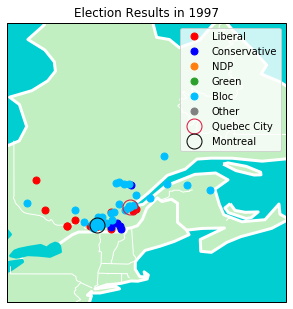

In [92]:
dfq1997 = dfqUnique[dfqUnique['Election Date'].str.contains('1997')]
elected = []
for row in dfq1997['Results']:
    elected.append(np.argmax(row))
    
dfq1997['elected'] = elected

# divide winning parties
dfq1997_0 = dfq1997[dfq1997['elected']==0]
dfq1997_1 = dfq1997[dfq1997['elected']==1]
dfq1997_2 = dfq1997[dfq1997['elected']==2]
dfq1997_3 = dfq1997[dfq1997['elected']==3]
dfq1997_4 = dfq1997[dfq1997['elected']==4]
dfq1997_5 = dfq1997[dfq1997['elected']==5]

lat_0, lon_0 = dfq1997_0['lat'].values, dfq1997_0['lon'].values
lat_1, lon_1 = dfq1997_1['lat'].values, dfq1997_1['lon'].values
lat_2, lon_2 = dfq1997_2['lat'].values, dfq1997_2['lon'].values
lat_3, lon_3 = dfq1997_3['lat'].values, dfq1997_3['lon'].values
lat_4, lon_4 = dfq1997_4['lat'].values, dfq1997_4['lon'].values
lat_5, lon_5 = dfq1997_5['lat'].values, dfq1997_5['lon'].values

fig = plt.figure(figsize=(5,10))
ax  = fig.add_subplot(1, 1, 1,
                     projection=ccrs.PlateCarree())

ax.set_title('Election Results in 1997')
ax.plot(lon_0, lat_0, '.', markersize=14,color='red', label='Liberal')
ax.plot(lon_1, lat_1, '.', markersize=14,color='blue', label='Conservative')
ax.plot(lon_2, lat_2, '.', markersize=14,color='C1', label='NDP')
ax.plot(lon_3, lat_3, '.', markersize=14,color='C2', label='Green')
ax.plot(lon_4, lat_4, '.', markersize=14,color='deepskyblue', label='Bloc')
ax.plot(lon_5, lat_5, '.', markersize=14,color='gray', label='Other')
#ax.stock_img()

# Create a feature for States/Admin 1 regions at 1:50m from Natural Earth
states_provinces = cfeature.NaturalEarthFeature(
        category='cultural',
        name='admin_1_states_provinces_lines',
        scale='50m',
        facecolor='none')
ax.add_feature(cfeature.LAND, color='limegreen', alpha=0.3)
ax.add_feature(cfeature.COASTLINE, edgecolor='white', linewidth=3)
ax.add_feature(cfeature.BORDERS, edgecolor='white', linewidth=3)
ax.add_feature(cfeature.OCEAN, color='darkturquoise')
ax.add_feature(cfeature.LAKES, color='darkturquoise', edgecolor='white', linewidth=3)
ax.add_feature(states_provinces, edgecolor='white')

ax.plot(-71.2080, 46.8139,'o', markersize=15, fillstyle='none', color='crimson', label='Quebec City')
ax.plot(-73.5673, 45.5017,'o', markersize=15, fillstyle='none', color='black', label='Montreal')
#ax.text(46.8139, 71.2080° W'Quebec City')

ax.set_xlim(-80,-60)
ax.set_ylim(40,60)
ax.legend(loc=1)
fig.savefig('maps_results/election_results_1997.png',bbox_inches='tight')

#dfq1997

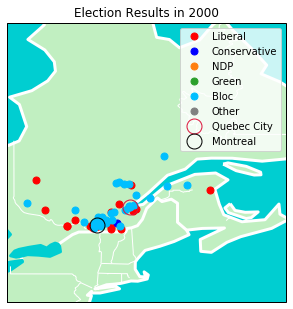

In [93]:
dfq2000 = dfqUnique[dfqUnique['Election Date'].str.contains('2000')]
elected = []
for row in dfq2000['Results']:
    elected.append(np.argmax(row))
    
dfq2000['elected'] = elected

# divide winning parties
dfq2000_0 = dfq2000[dfq2000['elected']==0]
dfq2000_1 = dfq2000[dfq2000['elected']==1]
dfq2000_2 = dfq2000[dfq2000['elected']==2]
dfq2000_3 = dfq2000[dfq2000['elected']==3]
dfq2000_4 = dfq2000[dfq2000['elected']==4]
dfq2000_5 = dfq2000[dfq2000['elected']==5]

lat_0, lon_0 = dfq2000_0['lat'].values, dfq2000_0['lon'].values
lat_1, lon_1 = dfq2000_1['lat'].values, dfq2000_1['lon'].values
lat_2, lon_2 = dfq2000_2['lat'].values, dfq2000_2['lon'].values
lat_3, lon_3 = dfq2000_3['lat'].values, dfq2000_3['lon'].values
lat_4, lon_4 = dfq2000_4['lat'].values, dfq2000_4['lon'].values
lat_5, lon_5 = dfq2000_5['lat'].values, dfq2000_5['lon'].values

fig = plt.figure(figsize=(5,10))
ax  = fig.add_subplot(1, 1, 1,
                     projection=ccrs.PlateCarree())
ax.set_title('Election Results in 2000')
ax.plot(lon_0, lat_0, '.', markersize=14,color='red', label='Liberal')
ax.plot(lon_1, lat_1, '.', markersize=14,color='blue', label='Conservative')
ax.plot(lon_2, lat_2, '.', markersize=14,color='C1', label='NDP')
ax.plot(lon_3, lat_3, '.', markersize=14,color='C2', label='Green')
ax.plot(lon_4, lat_4, '.', markersize=14,color='deepskyblue', label='Bloc')
ax.plot(lon_5, lat_5, '.', markersize=14,color='gray', label='Other')
#ax.stock_img()

# Create a feature for States/Admin 1 regions at 1:50m from Natural Earth
states_provinces = cfeature.NaturalEarthFeature(
        category='cultural',
        name='admin_1_states_provinces_lines',
        scale='50m',
        facecolor='none')
ax.add_feature(cfeature.LAND, color='limegreen', alpha=0.3)
ax.add_feature(cfeature.COASTLINE, edgecolor='white', linewidth=3)
ax.add_feature(cfeature.BORDERS, edgecolor='white', linewidth=3)
ax.add_feature(cfeature.OCEAN, color='darkturquoise')
ax.add_feature(cfeature.LAKES, color='darkturquoise', edgecolor='white', linewidth=3)
ax.add_feature(states_provinces, edgecolor='white')

ax.plot(-71.2080, 46.8139,'o', markersize=15, fillstyle='none', color='crimson', label='Quebec City')
ax.plot(-73.5673, 45.5017,'o', markersize=15, fillstyle='none', color='black', label='Montreal')
#ax.text(46.8139, 71.2080° W'Quebec City')

ax.set_xlim(-80,-60)
ax.set_ylim(40,60)
ax.legend(loc=1)
fig.savefig('maps_results/election_results_2000.png',bbox_inches='tight')

#dfq2000

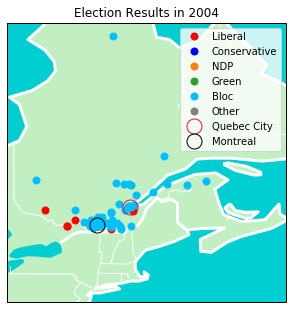

In [94]:
dfq2004 = dfqUnique[dfqUnique['Election Date'].str.contains('2004')]
elected = []
for row in dfq2004['Results']:
    elected.append(np.argmax(row))
    
dfq2004['elected'] = elected

# divide winning parties
dfq2004_0 = dfq2004[dfq2004['elected']==0]
dfq2004_1 = dfq2004[dfq2004['elected']==1]
dfq2004_2 = dfq2004[dfq2004['elected']==2]
dfq2004_3 = dfq2004[dfq2004['elected']==3]
dfq2004_4 = dfq2004[dfq2004['elected']==4]
dfq2004_5 = dfq2004[dfq2004['elected']==5]

lat_0, lon_0 = dfq2004_0['lat'].values, dfq2004_0['lon'].values
lat_1, lon_1 = dfq2004_1['lat'].values, dfq2004_1['lon'].values
lat_2, lon_2 = dfq2004_2['lat'].values, dfq2004_2['lon'].values
lat_3, lon_3 = dfq2004_3['lat'].values, dfq2004_3['lon'].values
lat_4, lon_4 = dfq2004_4['lat'].values, dfq2004_4['lon'].values
lat_5, lon_5 = dfq2004_5['lat'].values, dfq2004_5['lon'].values

fig = plt.figure(figsize=(5,10))
ax  = fig.add_subplot(1, 1, 1,
                     projection=ccrs.PlateCarree())
ax.set_title('Election Results in 2004')
ax.plot(lon_0, lat_0, '.', markersize=14,color='red', label='Liberal')
ax.plot(lon_1, lat_1, '.', markersize=14,color='blue', label='Conservative')
ax.plot(lon_2, lat_2, '.', markersize=14,color='C1', label='NDP')
ax.plot(lon_3, lat_3, '.', markersize=14,color='C2', label='Green')
ax.plot(lon_4, lat_4, '.', markersize=14,color='deepskyblue', label='Bloc')
ax.plot(lon_5, lat_5, '.', markersize=14,color='gray', label='Other')
#ax.stock_img()

# Create a feature for States/Admin 1 regions at 1:50m from Natural Earth
states_provinces = cfeature.NaturalEarthFeature(
        category='cultural',
        name='admin_1_states_provinces_lines',
        scale='50m',
        facecolor='none')
ax.add_feature(cfeature.LAND, color='limegreen', alpha=0.3)
ax.add_feature(cfeature.COASTLINE, edgecolor='white', linewidth=3)
ax.add_feature(cfeature.BORDERS, edgecolor='white', linewidth=3)
ax.add_feature(cfeature.OCEAN, color='darkturquoise')
ax.add_feature(cfeature.LAKES, color='darkturquoise', edgecolor='white', linewidth=3)
ax.add_feature(states_provinces, edgecolor='white')

ax.plot(-71.2080, 46.8139,'o', markersize=15, fillstyle='none', color='crimson', label='Quebec City')
ax.plot(-73.5673, 45.5017,'o', markersize=15, fillstyle='none', color='black', label='Montreal')
#ax.text(46.8139, 71.2080° W'Quebec City')

ax.set_xlim(-80,-60)
ax.set_ylim(40,60)
ax.legend(loc=1)
fig.savefig('maps_results/election_results_2004.png',bbox_inches='tight')

#dfq2004

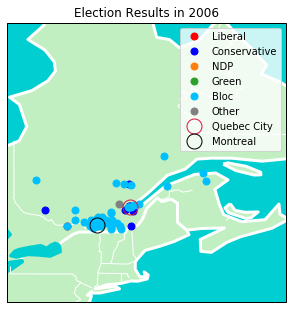

In [96]:
dfq2006 = dfqUnique[dfqUnique['Election Date'].str.contains('2006')]
elected = []
for row in dfq2006['Results']:
    elected.append(np.argmax(row))
    
dfq2006['elected'] = elected

# divide winning parties
dfq2006_0 = dfq2006[dfq2006['elected']==0]
dfq2006_1 = dfq2006[dfq2006['elected']==1]
dfq2006_2 = dfq2006[dfq2006['elected']==2]
dfq2006_3 = dfq2006[dfq2006['elected']==3]
dfq2006_4 = dfq2006[dfq2006['elected']==4]
dfq2006_5 = dfq2006[dfq2006['elected']==5]

lat_0, lon_0 = dfq2006_0['lat'].values, dfq2006_0['lon'].values
lat_1, lon_1 = dfq2006_1['lat'].values, dfq2006_1['lon'].values
lat_2, lon_2 = dfq2006_2['lat'].values, dfq2006_2['lon'].values
lat_3, lon_3 = dfq2006_3['lat'].values, dfq2006_3['lon'].values
lat_4, lon_4 = dfq2006_4['lat'].values, dfq2006_4['lon'].values
lat_5, lon_5 = dfq2006_5['lat'].values, dfq2006_5['lon'].values

fig = plt.figure(figsize=(5,10))
ax  = fig.add_subplot(1, 1, 1,
                     projection=ccrs.PlateCarree())
ax.set_title('Election Results in 2006')
ax.plot(lon_0, lat_0, '.', markersize=14,color='red', label='Liberal')
ax.plot(lon_1, lat_1, '.', markersize=14,color='blue', label='Conservative')
ax.plot(lon_2, lat_2, '.', markersize=14,color='C1', label='NDP')
ax.plot(lon_3, lat_3, '.', markersize=14,color='C2', label='Green')
ax.plot(lon_4, lat_4, '.', markersize=14,color='deepskyblue', label='Bloc')
ax.plot(lon_5, lat_5, '.', markersize=14,color='gray', label='Other')
#ax.stock_img()

# Create a feature for States/Admin 1 regions at 1:50m from Natural Earth
states_provinces = cfeature.NaturalEarthFeature(
        category='cultural',
        name='admin_1_states_provinces_lines',
        scale='50m',
        facecolor='none')
ax.add_feature(cfeature.LAND, color='limegreen', alpha=0.3)
ax.add_feature(cfeature.COASTLINE, edgecolor='white', linewidth=3)
ax.add_feature(cfeature.BORDERS, edgecolor='white', linewidth=3)
ax.add_feature(cfeature.OCEAN, color='darkturquoise')
ax.add_feature(cfeature.LAKES, color='darkturquoise', edgecolor='white', linewidth=3)
ax.add_feature(states_provinces, edgecolor='white')

ax.plot(-71.2080, 46.8139,'o', markersize=15, fillstyle='none', color='crimson', label='Quebec City')
ax.plot(-73.5673, 45.5017,'o', markersize=15, fillstyle='none', color='black', label='Montreal')
#ax.text(46.8139, 71.2080° W'Quebec City')

ax.set_xlim(-80,-60)
ax.set_ylim(40,60)
ax.legend(loc=1)
fig.savefig('maps_results/election_results_2006.png',bbox_inches='tight')

#dfq2006

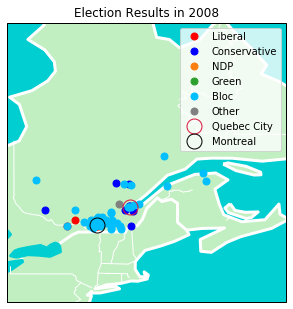

In [95]:
dfq2008 = dfqUnique[dfqUnique['Election Date'].str.contains('2008')]
elected = []
for row in dfq2008['Results']:
    elected.append(np.argmax(row))
    
dfq2008['elected'] = elected

# divide winning parties
dfq2008_0 = dfq2008[dfq2008['elected']==0]
dfq2008_1 = dfq2008[dfq2008['elected']==1]
dfq2008_2 = dfq2008[dfq2008['elected']==2]
dfq2008_3 = dfq2008[dfq2008['elected']==3]
dfq2008_4 = dfq2008[dfq2008['elected']==4]
dfq2008_5 = dfq2008[dfq2008['elected']==5]

lat_0, lon_0 = dfq2008_0['lat'].values, dfq2008_0['lon'].values
lat_1, lon_1 = dfq2008_1['lat'].values, dfq2008_1['lon'].values
lat_2, lon_2 = dfq2008_2['lat'].values, dfq2008_2['lon'].values
lat_3, lon_3 = dfq2008_3['lat'].values, dfq2008_3['lon'].values
lat_4, lon_4 = dfq2008_4['lat'].values, dfq2008_4['lon'].values
lat_5, lon_5 = dfq2008_5['lat'].values, dfq2008_5['lon'].values

fig = plt.figure(figsize=(5,10))
ax  = fig.add_subplot(1, 1, 1,
                     projection=ccrs.PlateCarree())
ax.set_title('Election Results in 2008')
ax.plot(lon_0, lat_0, '.', markersize=14,color='red', label='Liberal')
ax.plot(lon_1, lat_1, '.', markersize=14,color='blue', label='Conservative')
ax.plot(lon_2, lat_2, '.', markersize=14,color='C1', label='NDP')
ax.plot(lon_3, lat_3, '.', markersize=14,color='C2', label='Green')
ax.plot(lon_4, lat_4, '.', markersize=14,color='deepskyblue', label='Bloc')
ax.plot(lon_5, lat_5, '.', markersize=14,color='gray', label='Other')
#ax.stock_img()

# Create a feature for States/Admin 1 regions at 1:50m from Natural Earth
states_provinces = cfeature.NaturalEarthFeature(
        category='cultural',
        name='admin_1_states_provinces_lines',
        scale='50m',
        facecolor='none')
ax.add_feature(cfeature.LAND, color='limegreen', alpha=0.3)
ax.add_feature(cfeature.COASTLINE, edgecolor='white', linewidth=3)
ax.add_feature(cfeature.BORDERS, edgecolor='white', linewidth=3)
ax.add_feature(cfeature.OCEAN, color='darkturquoise')
ax.add_feature(cfeature.LAKES, color='darkturquoise', edgecolor='white', linewidth=3)
ax.add_feature(states_provinces, edgecolor='white')

ax.plot(-71.2080, 46.8139,'o', markersize=15, fillstyle='none', color='crimson', label='Quebec City')
ax.plot(-73.5673, 45.5017,'o', markersize=15, fillstyle='none', color='black', label='Montreal')
#ax.text(46.8139, 71.2080° W'Quebec City')

ax.set_xlim(-80,-60)
ax.set_ylim(40,60)
ax.legend(loc=1)
fig.savefig('maps_results/election_results_2008.png',bbox_inches='tight')

#dfq2008

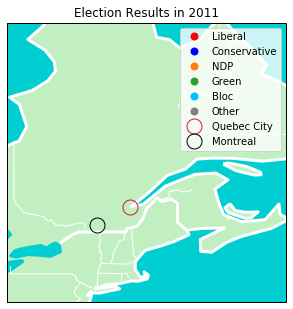

In [97]:
dfq2011 = dfqUnique[dfqUnique['Election Date'].str.contains('2011')]
elected = []
for row in dfq2011['Results']:
    elected.append(np.argmax(row))
    
dfq2011['elected'] = elected

# divide winning parties
dfq2011_0 = dfq2011[dfq2011['elected']==0]
dfq2011_1 = dfq2011[dfq2011['elected']==1]
dfq2011_2 = dfq2011[dfq2011['elected']==2]
dfq2011_3 = dfq2011[dfq2011['elected']==3]
dfq2011_4 = dfq2011[dfq2011['elected']==4]
dfq2011_5 = dfq2011[dfq2011['elected']==5]

lat_0, lon_0 = dfq2011_0['lat'].values, dfq2011_0['lon'].values
lat_1, lon_1 = dfq2011_1['lat'].values, dfq2011_1['lon'].values
lat_2, lon_2 = dfq2011_2['lat'].values, dfq2011_2['lon'].values
lat_3, lon_3 = dfq2011_3['lat'].values, dfq2011_3['lon'].values
lat_4, lon_4 = dfq2011_4['lat'].values, dfq2011_4['lon'].values
lat_5, lon_5 = dfq2011_5['lat'].values, dfq2011_5['lon'].values

fig = plt.figure(figsize=(5,10))
ax  = fig.add_subplot(1, 1, 1,
                     projection=ccrs.PlateCarree())
ax.set_title('Election Results in 2011')
ax.plot(lon_0, lat_0, '.', markersize=14,color='red', label='Liberal')
ax.plot(lon_1, lat_1, '.', markersize=14,color='blue', label='Conservative')
ax.plot(lon_2, lat_2, '.', markersize=14,color='C1', label='NDP')
ax.plot(lon_3, lat_3, '.', markersize=14,color='C2', label='Green')
ax.plot(lon_4, lat_4, '.', markersize=14,color='deepskyblue', label='Bloc')
ax.plot(lon_5, lat_5, '.', markersize=14,color='gray', label='Other')
#ax.stock_img()

# Create a feature for States/Admin 1 regions at 1:50m from Natural Earth
states_provinces = cfeature.NaturalEarthFeature(
        category='cultural',
        name='admin_1_states_provinces_lines',
        scale='50m',
        facecolor='none')
ax.add_feature(cfeature.LAND, color='limegreen', alpha=0.3)
ax.add_feature(cfeature.COASTLINE, edgecolor='white', linewidth=3)
ax.add_feature(cfeature.BORDERS, edgecolor='white', linewidth=3)
ax.add_feature(cfeature.OCEAN, color='darkturquoise')
ax.add_feature(cfeature.LAKES, color='darkturquoise', edgecolor='white', linewidth=3)
ax.add_feature(states_provinces, edgecolor='white')

ax.plot(-71.2080, 46.8139,'o', markersize=15, fillstyle='none', color='crimson', label='Quebec City')
ax.plot(-73.5673, 45.5017,'o', markersize=15, fillstyle='none', color='black', label='Montreal')
#ax.text(46.8139, 71.2080° W'Quebec City')

ax.set_xlim(-80,-60)
ax.set_ylim(40,60)
ax.legend(loc=1)
fig.savefig('maps_results/election_results_2011.png',bbox_inches='tight')

#dfq2011